In [113]:
%run Roll.py

Enter number of experiments:  1
Do you want to average over multiple runs? (y/n):  n


Longest streak in 1 experiments: 1


In [233]:
from minhashDemo.Hash import *
from minhashDemo.Parse import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time 
from datasketch import HyperLogLog
import copy

In [234]:
sequences=parse_fasta("sequences/sequences_len_10000.fasta")
k=21

In [235]:
def process_kmers(sequences, k):
    kmer_sets = {}
    
    for seq_id, sequence in sequences.items():
        #TODO: generate kmers from the sequences
        kmers = {}
        kmer_sets[seq_id] = kmers
    
    return kmer_sets

In [236]:
def compute_similarity_matrix(kmer_sets):
    
    sequence_ids = list(kmer_sets.keys())
    num_sequences = len(sequence_ids)
    similarity_matrix = np.zeros((num_sequences, num_sequences))  

    for i in range(num_sequences):
        for j in range(i, num_sequences):
            set1 = kmer_sets[sequence_ids[i]]
            set2 = kmer_sets[sequence_ids[j]]

            #TODO: Compute the Jaccard index for set 1 and 2
            
            similarity = 0
            
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  

    similarity_df = pd.DataFrame(similarity_matrix, index=sequence_ids, columns=sequence_ids)
    
    return similarity_df

In [237]:
def plot_similarity(similarity_df):
    
    plt.figure(figsize=(10, 8))  
    sns.heatmap(similarity_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    plt.title("Exact Jaccard Similarity Heatmap (K-mer Counting)")
    plt.xlabel("Sequences")
    plt.ylabel("Sequences")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.show()

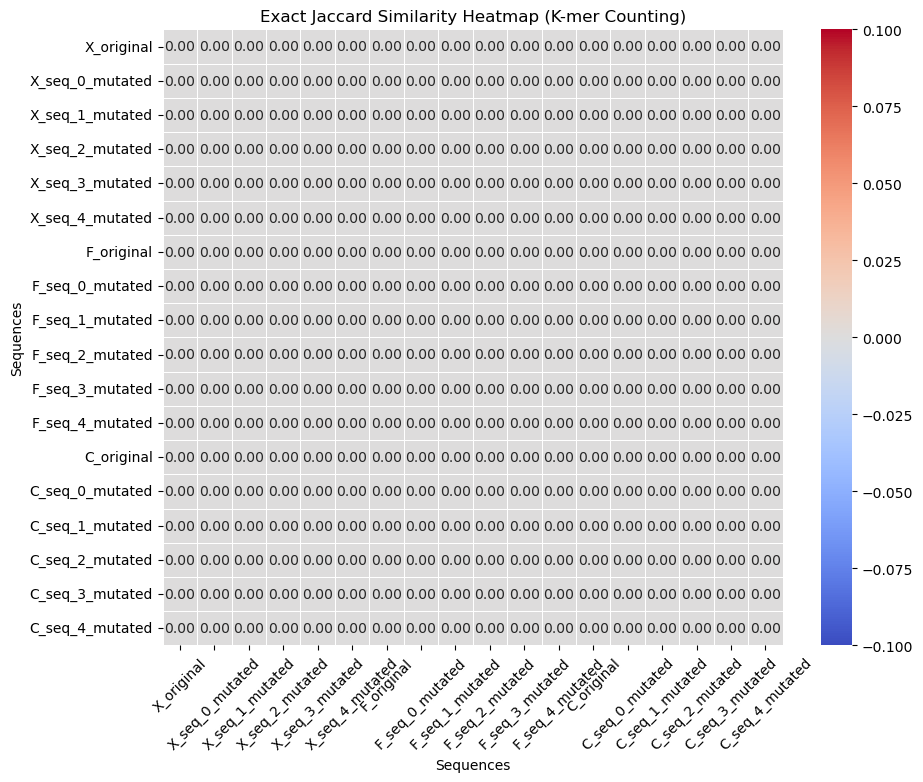

In [238]:
kmer_sets=process_kmers(sequences, k)
similarity_df=compute_similarity_matrix(kmer_sets)

plot_similarity(similarity_df)


In [239]:
def process_kmers_minhash(sequence, k, num_hashes):
    #TODO: create the signatures for the sequences
    

    return signature

In [240]:
def compute_signatures_minhash(sequences, k, num_hashes):
    """
    Generate minhash signatures for a set of sequences.
    """
    signatures = {}
    
    for seq_id, sequence in sequences.items():
        # Generate minhash signature for each sequence
        signature = process_kmers_minhash(sequence, k, num_hashes)
        signatures[seq_id] = signature
    
    return signatures

In [241]:
def compute_similarity_matrix_minhash(signatures):
    
    sequence_ids = list(signatures.keys())
    num_sequences = len(sequence_ids)
    similarity_matrix = np.zeros((num_sequences, num_sequences))  # Initialize similarity matrix
    
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            # Convert signatures to sets
            sig1 = set(signatures[sequence_ids[i]])
            sig2 = set(signatures[sequence_ids[j]])
            
            #TODO: Compute similarity between sig1 and sig2
            
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # Symmetric matrix
    
    # Convert to a pandas DataFrame for better visualization
    similarity_df = pd.DataFrame(similarity_matrix, index=sequence_ids, columns=sequence_ids)
    
    return similarity_df

In [242]:
num_hashes = 10  # Number of hash functions (minhash signature length)

signatures = compute_signatures_minhash(sequences, k, num_hashes)

#for seq_id, signature in signatures.items():
    #print(f"Minhash Signature for {seq_id}: {signature}")
minhash_similarity_df=compute_similarity_matrix_minhash(signatures)

plot_similarity(minhash_similarity_df)

NameError: name 'similarity' is not defined

In [243]:

def process_kmers_hll(sequence, k, hll_precision=12):
    #http://ekzhu.com/datasketch/hyperloglog.html
    #TODO: Add kmers to the data structure
    hll = None
    return hll


In [244]:
def compute_similarity_hll(sequences, k, hll_precision=12):
    
    sequence_ids = list(sequences.keys())
    num_sequences = len(sequence_ids)
    sketches = {seq_id: process_kmers_hll(sequences[seq_id], k, hll_precision) for seq_id in sequence_ids}
    
    # Initialize similarity matrix
    similarity_matrix = np.zeros((num_sequences, num_sequences))

    # Compute Jaccard similarity
    for i in range(num_sequences):
        for j in range(i, num_sequences):
            hll1, hll2 = sketches[sequence_ids[i]], sketches[sequence_ids[j]]

            #TODO: Estimate the similarity based on hll1 and hll2
            
            # Store in matrix (symmetric)
            similarity_matrix[i, j] = jaccard_similarity
            similarity_matrix[j, i] = jaccard_similarity
    
    return pd.DataFrame(similarity_matrix, index=sequence_ids, columns=sequence_ids)

In [245]:
similarity_df_hll=similarity_matrix = compute_similarity_hll(sequences, k, hll_precision=10)
plot_similarity(similarity_df_hll)


NameError: name 'jaccard_similarity' is not defined

In [246]:
def greedy_clustering(similarity_matrix, threshold=0.005):
    sequence_ids = list(similarity_matrix.index)
    num_sequences = len(sequence_ids)
    clusters = []
    assigned = set()
    
    for i in range(num_sequences):
        if sequence_ids[i] in assigned:
            continue
        
        cluster = {sequence_ids[i]}
        for j in range(num_sequences):
            if sequence_ids[j] != sequence_ids[i] and similarity_matrix.iloc[i, j] > threshold:
                cluster.add(sequence_ids[j])
                assigned.add(sequence_ids[j])
        
        clusters.append(cluster)
        assigned.add(sequence_ids[i])
    
    return clusters

def select_references(clusters, sequences):
    reference_sequences = {}
    for cluster in clusters:
        ref = max(cluster, key=lambda seq_id: len(sequences[seq_id]))
        reference_sequences[ref] = cluster
    return reference_sequences

def assign_remaining_sequences(reference_sequences, similarity_matrix):
    assignments = {}
    for seq_id in similarity_matrix.index:
        if seq_id in reference_sequences:
            continue
        
        best_ref = max(reference_sequences.keys(), key=lambda ref: similarity_matrix.at[seq_id, ref])
        assignments[seq_id] = best_ref
    
    return assignments


In [247]:
similarity_matrix = similarity_df
clusters = greedy_clustering(similarity_matrix)
reference_sequences = select_references(clusters, sequences)
assignments = assign_remaining_sequences(reference_sequences, similarity_matrix)
print("\nFinal Clusters:")
for ref, cluster in assignments.items():
    print(f"Reference: {ref}, Cluster: {cluster}")


Final Clusters:
